In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
x = np.fromfile('symbols.f32', dtype = 'float32')

In [3]:
x = x[3000:]

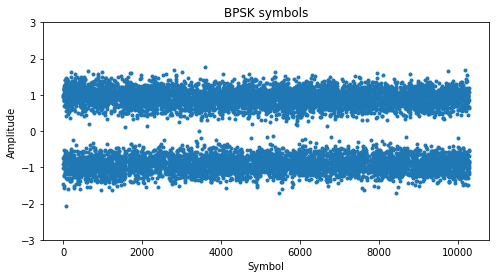

In [4]:
plt.figure(figsize = (8,4), facecolor = 'w')
plt.plot(x, '.')
plt.ylim((-3,3))
plt.title('BPSK symbols')
plt.xlabel('Symbol')
plt.ylabel('Amplitude');

In [5]:
corr = scipy.signal.correlate(x, x, mode = 'full')/np.sum(np.abs(x))

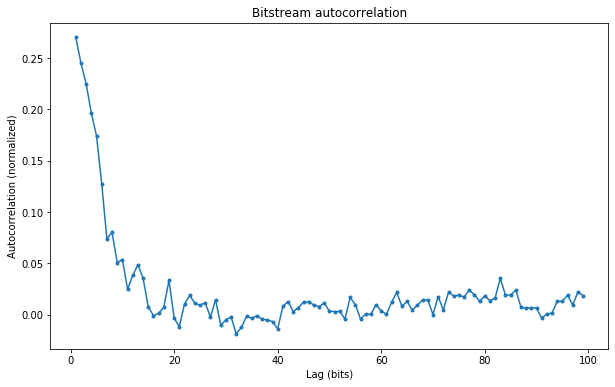

In [6]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(np.arange(1, 100), corr[corr.size//2+1:corr.size//2+100], '.-')
plt.title('Bitstream autocorrelation')
plt.ylabel('Autocorrelation (normalized)')
plt.xlabel('Lag (bits)');

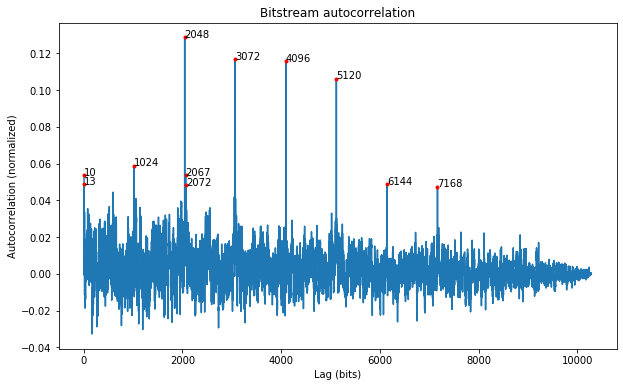

In [7]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(np.arange(10, corr.size-(corr.size//2)), corr[corr.size//2+10:])
peaks = np.where(corr[corr.size//2+10:] > 0.045)[0]
plt.plot(np.arange(10, corr.size-(corr.size//2))[peaks], corr[corr.size//2+10:][peaks], '.', color = 'red')
for peak in peaks:
    loc = np.arange(10, corr.size-(corr.size//2))[peak]
    plt.text(loc, corr[corr.size//2+10:][peak], str(loc))
plt.title('Bitstream autocorrelation')
plt.ylabel('Autocorrelation (normalized)')
plt.xlabel('Lag (bits)');

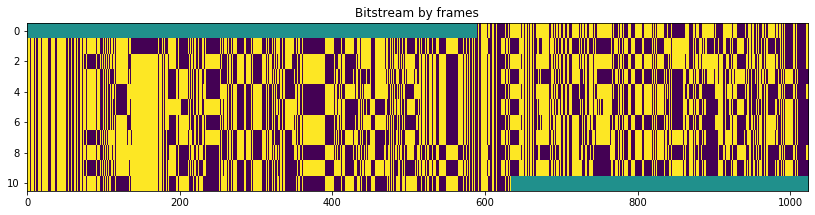

In [8]:
framesize = 1024
plt.figure(figsize = (14,6), facecolor = 'w')
pad = 589
x_pad = np.concatenate((np.zeros(pad), np.sign(x)))
x_pad = np.concatenate((x_pad, np.zeros(framesize - x_pad.size % framesize)))
plt.imshow(x_pad.reshape((-1,framesize)), aspect = 20)
plt.title('Bitstream by frames');

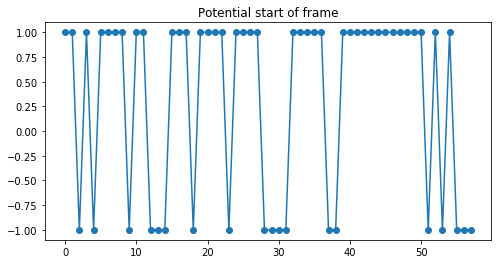

In [9]:
plt.figure(figsize = (8,4), facecolor = 'w')
x_accum = np.sum(x_pad.reshape((-1,framesize)), axis = 0)/np.sum(np.abs(x_pad).reshape((-1,framesize)), axis = 0)
plt.plot(x_accum[:58], 'o-')
plt.title('Potential start of frame');

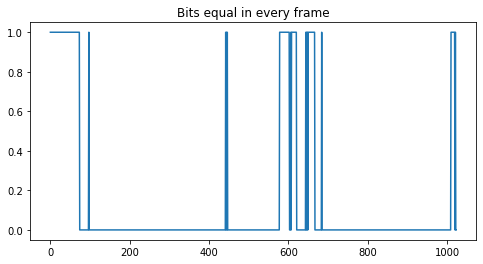

In [10]:
plt.figure(figsize = (8,4), facecolor = 'w')
plt.plot(np.abs(x_accum) == 1)
plt.title('Bits equal in every frame');

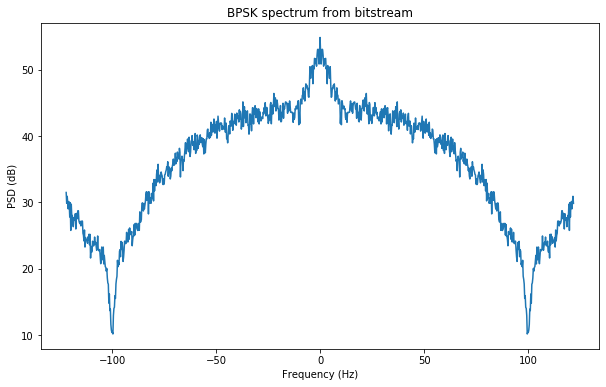

In [11]:
T = 1/100
sps = 10
N = 4096
f_span = 500
y = np.repeat(np.sign(x), 10)
f = np.fft.fftshift(np.average(np.abs(np.fft.fft(y[:y.size//N*N].reshape((-1,N))))**2, axis = 0))
sel = slice(f.size//2 - f_span, f.size//2 + f_span)
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N, T/sps))[sel], 10*np.log10(f[sel]))
plt.title('BPSK spectrum from bitstream')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)');